# 拡張カルマンフィルタ

In [15]:
import sys
sys.path.append('../src')
import importlib

import worlds
import maps
import numpy as np
import robots
import sensors
import agents
import landmarks
import estimators

def reload():
    importlib.reload(worlds)
    importlib.reload(maps)
    importlib.reload(robots)
    importlib.reload(sensors)
    importlib.reload(agents)
    importlib.reload(estimators)
    
reload()

In [24]:
reload()

# 検証用の関数
def trial():
    time_interval = 0.1
    world = worlds.World(30., time_interval, debuggable=False)
    
    m = maps.Map()
    for ln in [(-4., 2.), (2., -3.), (3., 3.)]:
        m.append_landmark(landmarks.Point2DLandmark(*ln))
    world.append(m)
    
    initial_pose = np.array([0., 0., 0.]).T
    estimator = estimators.ExtendedKalmanFilter(m, initial_pose)
    
    a = agents.EstimationAgent(
        time_interval, 0.2, 10./180.*np.pi, estimator=estimator)
    
    r = robots.Robot(initial_pose, sensor=sensors.Camera(m), agent=a, color='red')
    world.append(r)
    
    world.draw()

<IPython.core.display.Javascript object>


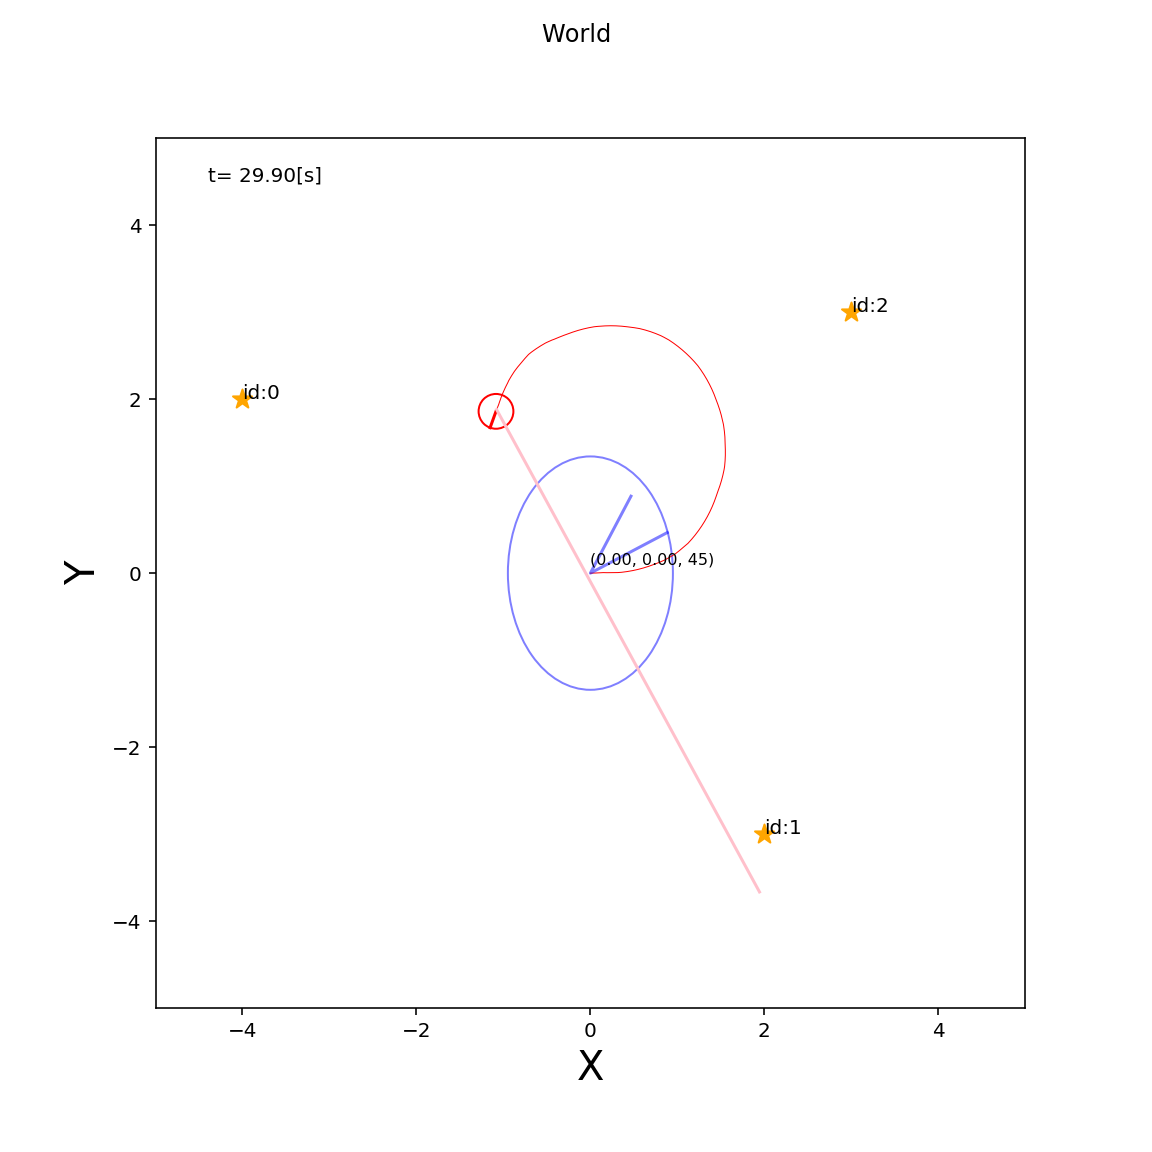

In [25]:
trial()